# Anomaly Detection of AAPL Tweets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Twitter_volume_AAPL.csv", index_col=[0], parse_dates=[0])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15902 entries, 2015-02-26 21:42:53 to 2015-04-23 02:47:53
Data columns (total 1 columns):
value    15902 non-null int64
dtypes: int64(1)
memory usage: 248.5 KB
None


,value
timestamp,
2015-02-26 21:42:53,104
2015-02-26 21:47:53,100
2015-02-26 21:52:53,99
2015-02-26 21:57:53,154
2015-02-26 22:02:53,120


## Feature Engineering

### 1. Dropping all NaN Values

First, I will be checking if there are any NaN values to be dropped.

In [3]:
numNaN = df.isna().sum()
numNaN

value    0
dtype: int64

Cool! There are 0 NaN values so we won't be needing to drop any.

### 2. Grouping values by 30 minutes

The reason i did this was because by grouping values by 30 minute intervals. It will be more obvious to spots anomalies as the value difference will be larger.

In [4]:
df = df.resample('30T').sum()

### 3. Visualization

Now lets do some visualizations to see if we can start spotting any obvious anomalies.

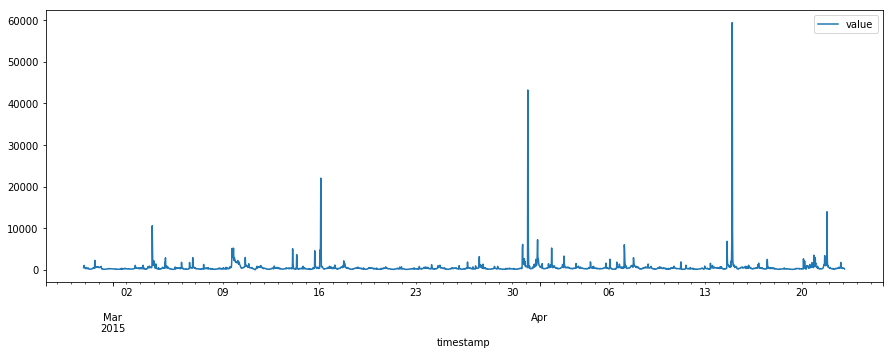

In [5]:
df.plot(figsize=(15, 5))

As we can see from the graph, we can hypothesize that there are some distinct anomalies around March 4-5, 16-17, 31 and April 15, 22-23.

## Building the Anomaly Detection Model

Lets now build the anomaly detection model. I have 3 goals in mind as I build the model.

(Goal 1): To see if our model validates our hypothesis above.

(Goal 2): To see if it is able to detect any other anomalies.

(Goal 3): Visualize those anomalies detected.

For this project I will be using the Isolation Forest and the Local Outlier Factor Model.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### Data pre-processing

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

### Isolation Forest

I will first start with the Isolation Forest Model as it is fast, accurate, and easy to implement.

#### Training and Predicting

In [8]:
modelIF =  IsolationForest()
modelIF.fit(df_scaled)

df['anomaly'] = modelIF.predict(df_scaled)

#### Visualization

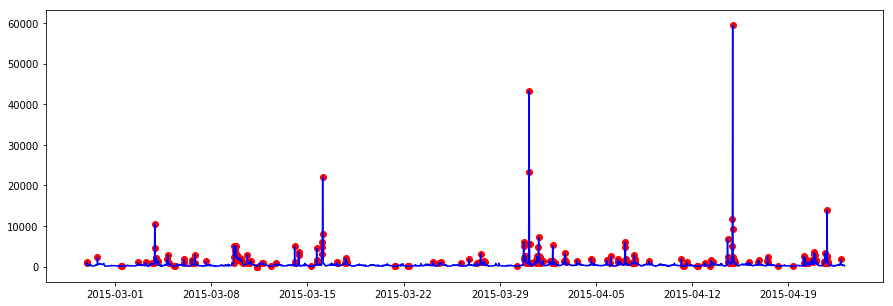

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

anamoly = df.loc[df['anomaly'] == -1, ['value']]

ax.plot(df.index, df['value'], color='blue', label = 'Normal')
ax.scatter(anamoly.index,anamoly['value'], color='red', label = 'Anomaly')

plt.show();

### Local Outlier Factor

Next I will try out the Local Outlier Factor Model as it is also easy to implement and reason. I am also curious to see if it will have similar results as the Isolation Forest.

#### Training and Predicting

In [10]:
modelLOF = LocalOutlierFactor()

df['anomaly'] = modelLOF.fit_predict(df_scaled)

#### Visualization

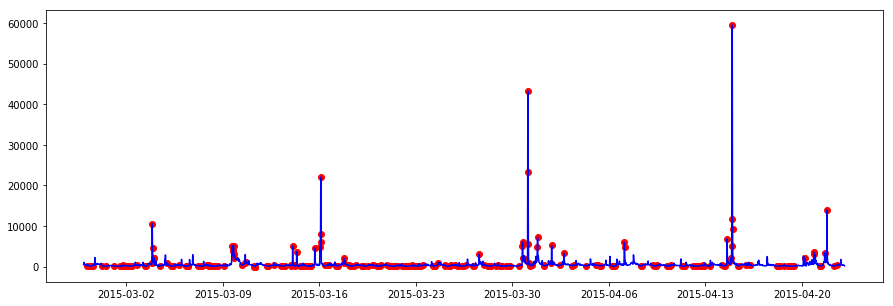

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))

anamoly = df.loc[df['anomaly'] == -1, ['value']]

ax.plot(df.index, df['value'], color='blue', label = 'Normal')
ax.scatter(anamoly.index,anamoly['value'], color='red', label = 'Anomaly')

plt.show();

## Conclusion

Through comparing both visualizations, we can see that both visualization looks great, matches the hypothesis we had above and it was also able to identify other anomaly spots. Therefore meeting all 3 of our goals.

Through obersving both visualizations, we can also see that the Local Outlier Factor has much more anomalies compared to the Isolation Forest. This could be because the Local Outlier Factor has difficulty determining the minimum number of points and distance function for a cluster. 

I am however very satisfied with the results for the Isolation Forest model and would recommend using that model for similar projects.